In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/B.txt', delimiter=';')
#data = pd.read_csv('/content/drive/MyDrive/household_power_consumptionNew.csv')
data1 = data
df2 = pd.DataFrame(data1)

df2['V1'] = pd.to_datetime(df2['V1'])
print(data)

                            V1          V2     V3     V4     V5     V6
319001000000007001  2012-01-01  00:00:00        1  17.97  20.73  18.57
319001000000007001  2012-01-01  00:15:00        2  20.43  23.55  21.24
319001000000007001  2012-01-01  00:30:00        3  20.46  23.82  21.51
319001000000007001  2012-01-01  00:45:00        4  23.76  26.64  24.18
319001000000007001  2012-01-01  01:00:00        5  20.76  23.88  21.57
...                        ...         ...    ...    ...    ...    ...
319001000000007001  2012-12-31  22:45:00    35132  80.40  82.44  83.88
319001000000007001  2012-12-31  23:00:00    35133  81.48  83.64  84.48
319001000000007001  2012-12-31  23:15:00    35134  81.96  84.00  84.96
319001000000007001  2012-12-31  23:30:00    35135  81.24  83.28  84.24
319001000000007001  2012-12-31  23:45:00    35136  81.60  83.28  84.36

[35136 rows x 6 columns]


In [ ]:
df = pd.DataFrame(data)
print(df['V1'].tail())

319001000000005001   2012-12-31
319001000000005001   2012-12-31
319001000000005001   2012-12-31
319001000000005001   2012-12-31
319001000000005001   2012-12-31
Name: V1, dtype: datetime64[ns]


In [ ]:
df = pd.DataFrame(data)

data_types = df.dtypes

print(data_types)
df['V1'] = pd.to_datetime(df['V1'])
print(df)

V1    datetime64[ns]
V2            object
V3             int64
V4           float64
V5           float64
V6           float64
dtype: object
                           V1          V2     V3     V4   V5     V6
319001000000005001 2012-01-01  00:00:00        1  37.98  0.0  38.34
319001000000005001 2012-01-01  00:15:00        2  41.94  0.0  42.54
319001000000005001 2012-01-01  00:30:00        3  38.16  0.0  37.68
319001000000005001 2012-01-01  00:45:00        4  38.64  0.0  39.00
319001000000005001 2012-01-01  01:00:00        5  39.00  0.0  39.12
...                       ...         ...    ...    ...  ...    ...
319001000000005001 2012-12-31  22:45:00    35132  49.56  0.0  48.72
319001000000005001 2012-12-31  23:00:00    35133  51.78  0.0  51.48
319001000000005001 2012-12-31  23:15:00    35134  47.58  0.0  47.22
319001000000005001 2012-12-31  23:30:00    35135  50.76  0.0  50.76
319001000000005001 2012-12-31  23:45:00    35136  41.52  0.0  40.86

[35136 rows x 6 columns]


In [ ]:
data['year'] = data['V1'].apply(lambda x: x.year)
data['quarter'] = data['V1'].apply(lambda x: x.quarter)
data['month'] = data['V1'].apply(lambda x: x.month)
data['day'] = data['V1'].apply(lambda x: x.day)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data['V6'] = pd.to_numeric(data['V6'], errors='coerce')
data = data.dropna(subset=['V6'])

dataset = data.V6.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1
print(dataset)
scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)


train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

[[38.34]
 [42.54]
 [37.68]
 ...
 [47.22]
 [50.76]
 [40.86]]


In [ ]:
print(dataset)

[[0.62643313]
 [0.6933121 ]
 [0.6159236 ]
 ...
 [0.7678344 ]
 [0.8242038 ]
 [0.66656053]]


In [ ]:
col_dates = data.V1.values
col_dates = np.reshape(col_dates, (-1, 1))
date_train, date_test = col_dates[0:train_size, :], col_dates[train_size:len(dataset), :]

In [ ]:
def create_dataset(dataset, dates, look_back=1):
    X, Y = [], []
    d = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        d.append(dates[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(d)

look_back = 30
X_train, Y_train, d_train = create_dataset(train, date_train, look_back)
X_test, Y_test, d_test = create_dataset(test, date_test, look_back)

X_train2, Y_train2, d_train2 = create_dataset(train, date_train, look_back)
X_test2, Y_test2, d_test2 = create_dataset(test, date_test, look_back)

X_train3, Y_train3, d_train3 = X_train, Y_train, d_train
X_test3, Y_test3, d_test3 = X_test, Y_test, d_test

In [ ]:

Y_train.shape

(28077,)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(28077, 1, 30)

In [ ]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))
X_train2.shape

X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))

In [ ]:
Y_train.shape

(28077,)

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import *
# model = Sequential()

# # Adding the first layer with 100 LSTM units and input shape of the data
# model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# # Adding a dropout layer to avoid overfitting
# model.add(Dropout(0.2))

# # Adding a dense layer with 1 unit to make predictions
# model.add(Dense(1))

# # Compiling the model with mean squared error as the loss function and using Adam optimizer
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Fitting the model on training data and using early stopping to avoid overfitting
# history = model.fit(X_train, Y_train, epochs=10, batch_size=3200, validation_data=(X_test, Y_test),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Displaying a summary of the model
# model.summary()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2  # Import from tensorflow.keras for L2

model = Sequential()

# Reduce number of units
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))

# Remove Dropout temporarily (optional)
# model.add(Dropout(0.2))

# Add L2 regularization
model.add(Dense(1, kernel_regularizer=l2(0.01)))

# Compile and fit (rest remains same)
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=10, batch_size=3200, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

model.summary()

Epoch 1/10
9/9 [==============================] - 2s 51ms/step - loss: 0.3719 - val_loss: 0.1684
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0863 - val_loss: 0.0344
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0314 - val_loss: 0.0434
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0392 - val_loss: 0.0375
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0294 - val_loss: 0.0303
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0271 - val_loss: 0.0308
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0272 - val_loss: 0.0299
Epoch 8/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0262 - val_loss: 0.0295
Epoch 9/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0259 - val_loss: 0.0293
Epoch 10/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0257 - val_loss: 0.0289
Model: "sequential_36"
___________

In [ ]:
# model1 = Sequential()

# # Add the Bi-LSTM layer with 100 units in each direction
# model1.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# # Add dropout for regularization
# model1.add(Dropout(0.2))

# # Add another Bi-LSTM layer, no need for return_sequences here as it's the last LSTM layer
# model1.add(Bidirectional(LSTM(100)))

# # Add the output layer
# model1.add(Dense(1))

# # Compile the model
# model1.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model
# history2 = model1.fit(X_train2, Y_train2, epochs=10, batch_size=3200, validation_data=(X_test2, Y_test2),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Display model summary
# model1.summary()

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

model1 = Sequential()

# Reduce number of units in Bi-LSTM layers
model1.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# Remove Dropout temporarily

model1.add(Bidirectional(LSTM(64)))

# Add L2 regularization to Dense layer
model1.add(Dense(1, kernel_regularizer=l2(0.001)))

# Compile and fit (rest remains same)
model1.compile(loss='mean_squared_error', optimizer='adam')
history2 = model1.fit(X_train2, Y_train2, epochs=10, batch_size=1600, validation_data=(X_test2, Y_test2),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

model1.summary()

Epoch 1/10
18/18 [==============================] - 8s 94ms/step - loss: 0.1209 - val_loss: 0.0274
Epoch 2/10
18/18 [==============================] - 1s 33ms/step - loss: 0.0163 - val_loss: 0.0144
Epoch 3/10
18/18 [==============================] - 1s 33ms/step - loss: 0.0121 - val_loss: 0.0146
Epoch 4/10
18/18 [==============================] - 1s 33ms/step - loss: 0.0111 - val_loss: 0.0140
Epoch 5/10
18/18 [==============================] - 1s 34ms/step - loss: 0.0108 - val_loss: 0.0137
Epoch 6/10
18/18 [==============================] - 1s 32ms/step - loss: 0.0106 - val_loss: 0.0134
Epoch 7/10
18/18 [==============================] - 1s 32ms/step - loss: 0.0103 - val_loss: 0.0132
Epoch 8/10
18/18 [==============================] - 1s 33ms/step - loss: 0.0101 - val_loss: 0.0129
Epoch 9/10
18/18 [==============================] - 1s 33ms/step - loss: 0.0098 - val_loss: 0.0126
Epoch 10/10
18/18 [==============================] - 1s 32ms/step - loss: 0.0096 - val_loss: 0.0123
Model: "s

In [ ]:
# from tensorflow.keras.layers import GRU, Dropout, Dense

# model3 = Sequential()

# # Add the GRU layer with 100 units
# model3.add(GRU(100, input_shape=(X_train3.shape[1], X_train3.shape[2])))

# # Add dropout for regularization
# model3.add(Dropout(0.2))

# # Add the output layer
# model3.add(Dense(1))

# # Compile the model
# model3.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model
# history3 = model3.fit(X_train3, Y_train3, epochs=10, batch_size=1600, validation_data=(X_test3, Y_test3),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Display model summary
# model3.summary()

In [ ]:
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.regularizers import l2

model4 = Sequential()

# Reduce number of units
model4.add(GRU(64, input_shape=(X_train3.shape[1], X_train3.shape[2])))

# Remove dropout layer (optional)
# model4.add(Dropout(0.2))

# Add L2 regularization to Dense layer
model4.add(Dense(1, kernel_regularizer=l2(0.001)))

# Compile and fit (rest remains same)
model4.compile(loss='mean_squared_error', optimizer='adam')
history4 = model4.fit(X_train3, Y_train3, epochs=10, batch_size=1600, validation_data=(X_test3, Y_test3),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

model4.summary()

Epoch 1/10
18/18 [==============================] - 2s 27ms/step - loss: 0.0985 - val_loss: 0.0301
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 0.0208 - val_loss: 0.0188
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.0186
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0138 - val_loss: 0.0177
Epoch 5/10
18/18 [==============================] - 0s 9ms/step - loss: 0.0132 - val_loss: 0.0171
Epoch 6/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0128 - val_loss: 0.0165
Epoch 7/10
18/18 [==============================] - 0s 10ms/step - loss: 0.0123 - val_loss: 0.0160
Epoch 8/10
18/18 [==============================] - 0s 11ms/step - loss: 0.0119 - val_loss: 0.0155
Epoch 9/10
18/18 [==============================] - 0s 10ms/step - loss: 0.0115 - val_loss: 0.0150
Epoch 10/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0112 - val_loss: 0.0146
Model: "sequen

In [ ]:
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of Y_train: (28077,)
Shape of Y_test: (6997,)


In [ ]:
from sklearn.metrics import *

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

219/219 [==============================] - 0s 978us/step
Train Mean Absolute Error: 4.462720410342211
Train Root Mean Squared Error: 6.114510560822183
Test Mean Absolute Error: 4.988667646348647
Test Root Mean Squared Error: 7.143720094947387


In [ ]:
train_predict1 = model1.predict(X_train2)
test_predict1 = model1.predict(X_test2)
# invert predictions
train_predict1 = scaler.inverse_transform(train_predict1)
Y_train2 = scaler.inverse_transform([Y_train2])
test_predict1 = scaler.inverse_transform(test_predict1)
Y_test2 = scaler.inverse_transform([Y_test2])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train2[0], train_predict1[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train2[0], train_predict1[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test2[0], test_predict1[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:,0])))

219/219 [==============================] - 0s 1ms/step
Train Mean Absolute Error: 4.016610240761809
Train Root Mean Squared Error: 5.334988009200967
Test Mean Absolute Error: 4.436057859240421
Test Root Mean Squared Error: 6.3137754026463275


In [ ]:
train_predict2 = model4.predict(X_train3)
test_predict2 = model4.predict(X_test3)
# invert predictions
train_predict2 = scaler.inverse_transform(train_predict2)
Y_train3 = scaler.inverse_transform([Y_train3])
test_predict2 = scaler.inverse_transform(test_predict2)
Y_test3 = scaler.inverse_transform([Y_test3])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train3[0], train_predict2[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train3[0], train_predict2[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test3[0], test_predict2[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test3[0], test_predict2[:,0])))

219/219 [==============================] - 0s 977us/step
Train Mean Absolute Error: 4.486172154191324
Train Root Mean Squared Error: 6.072232026440538
Test Mean Absolute Error: 5.057543043128905
Test Root Mean Squared Error: 7.149195000082396


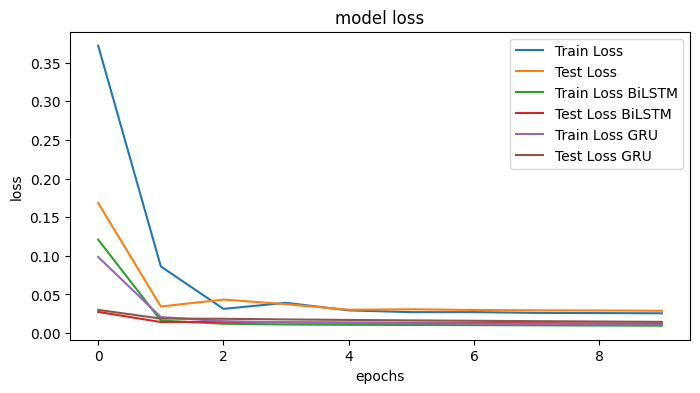

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.plot(history2.history['loss'], label='Train Loss BiLSTM')
plt.plot(history2.history['val_loss'], label='Test Loss BiLSTM')
plt.plot(history4.history['loss'], label='Train Loss GRU')
plt.plot(history4.history['val_loss'], label='Test Loss GRU')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

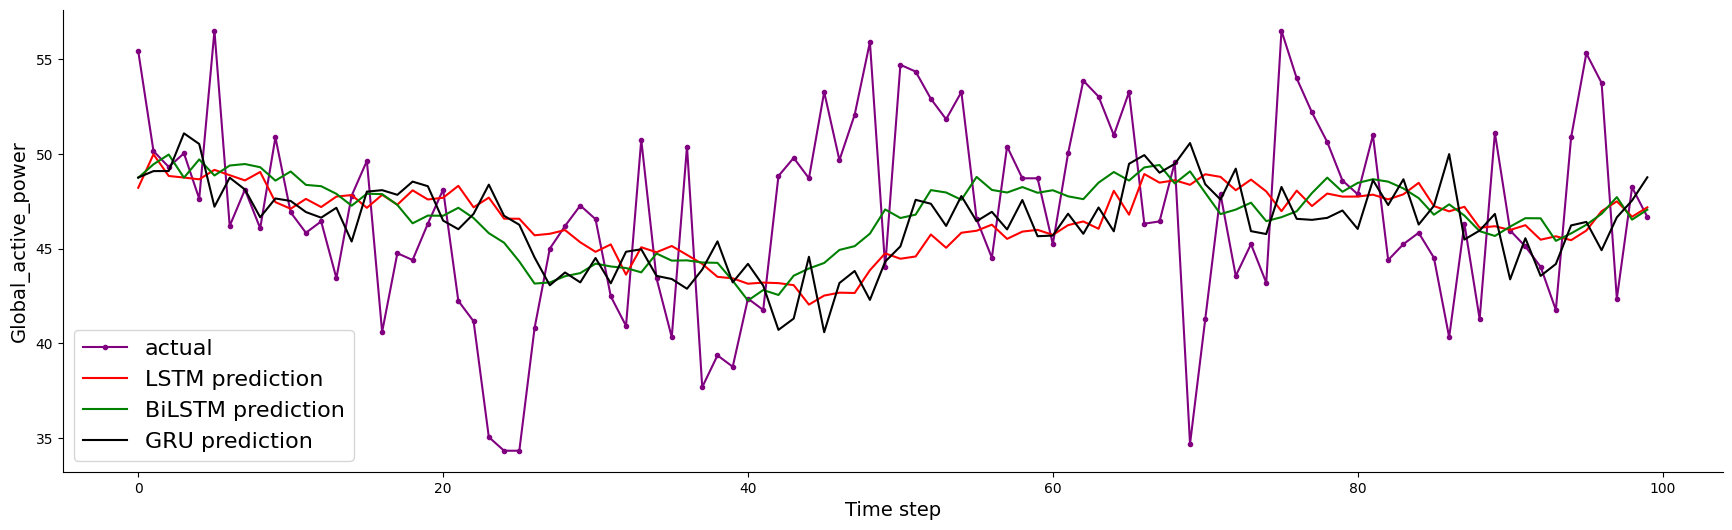

In [ ]:
import seaborn as sns
aa=[x for x in range(100)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][:100], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:100], '-', label="LSTM prediction", color='red')

plt.plot(aa, test_predict1[:,0][:100], '-', label="BiLSTM prediction", color='green')
plt.plot(aa, test_predict2[:,0][:100], '-', label="GRU prediction", color='black')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()


In [ ]:
def calculate_error_table(Y_test, test_predict, dates):


    error_table = {}
    date_count = {}

    for date, actual, predicted in zip(dates, Y_test, test_predict):
        error = (abs(actual - predicted[0]) / actual) * 100
        if date not in date_count:
            date_count[date] = 0
            error_table[date] = 0
        date_count[date] += 1
        error_table[date] += error

    for date in error_table:
        error_table[date] /= date_count[date]

    # Repeat for other models (test_predict1, test_predict2) with appropriate error calculations
    return error_table

# Example usage
error_percentages_lstm = calculate_error_table(Y_test[0], test_predict, d_test)
error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
error_percentages_gru = calculate_error_table(Y_test3[0], test_predict2, d_test3)

In [ ]:
percentage_df = pd.DataFrame(zip(error_percentages_lstm.keys(), error_percentages_lstm.values(), error_percentages_bilstm.values(), error_percentages_gru.values()), columns=["Date", "LSTM(%)", "BiLSTM(%)", "GRU(%)"])

percentage_df.head(40)

,Date,LSTM(%),BiLSTM(%),GRU(%)
0,2012-10-20,9.438026,8.676086,9.402625
1,2012-10-21,13.088690,12.152797,13.577209
2,2012-10-22,10.557217,9.680471,11.056804
3,2012-10-23,14.571207,12.152606,14.246043
4,2012-10-24,15.099655,13.685285,15.137132
5,2012-10-25,9.578727,7.787925,9.229888
6,2012-10-26,12.459267,11.115981,12.681035
7,2012-10-27,9.002774,8.382514,9.448755
8,2012-10-28,13.466727,11.660992,13.484622
9,2012-10-29,14.814767,12.312811,14.265023


In [ ]:
average_error_lstm = percentage_df["LSTM(%)"].mean()
average_error_bilstm = percentage_df["BiLSTM(%)"].mean()
average_error_gru = percentage_df["GRU(%)"].mean()

# Find the method with the lowest average error
best_method = None
lowest_error = min(average_error_lstm, average_error_bilstm, average_error_gru)
if lowest_error == average_error_lstm:
 best_method = "LSTM"
elif lowest_error == average_error_bilstm:
 best_method = "BiLSTM"
else:
 best_method = "GRU"

# Print the DataFrame with additional information
print(percentage_df)
print(f"\nOverall Best Method: {best_method} (Average Error: {lowest_error:.4f}%)")

         Date     LSTM(%)   BiLSTM(%)      GRU(%)
0  2012-10-20    9.438026    8.676086    9.402625
1  2012-10-21   13.088690   12.152797   13.577209
2  2012-10-22   10.557217    9.680471   11.056804
3  2012-10-23   14.571207   12.152606   14.246043
4  2012-10-24   15.099655   13.685285   15.137132
..        ...         ...         ...         ...
68 2012-12-27 -200.267179 -187.363592 -208.268473
69 2012-12-28    9.189943    8.198042    9.494614
70 2012-12-29   11.199511    9.815685   11.450688
71 2012-12-30 -171.900953 -142.302380 -167.174619
72 2012-12-31 -128.930920 -134.501735 -138.108313

[73 rows x 4 columns]

Overall Best Method: GRU (Average Error: -27.6530%)
